# IMPORTING DATASET

In [7]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.utils import shuffle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score
dpath = r'C:\Users\MUJ\Desktop\MINOR PROJECT\fifa.csv'
dataset = pd.read_csv(dpath) 
dataset.head()
dataset.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# New column evolution


In [10]:
dataset['difference'] = (dataset['Potential'] - (dataset['Overall']))
def evolution(d):
    if d == 0:
        return "Stable"
    elif d >=1 and d<=5:
        return "Small"
    elif d >=6 and d<=10:
        return "Medium"
    elif d >11:
        return "Big"
dataset['Evolution'] = dataset['difference'].apply(evolution)



# CONVERTING VALUES TO INTEGER


In [11]:
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
dataset['ValueNum'] = dataset['Value'].apply(lambda x: str2number(x))
dataset['WageNum'] = dataset['Wage'].apply(lambda x: str2number(x))

In [12]:
def weight_to_int(weight):
    if weight=='lbs':
        value = weight[:-3]
        return value    
dataset['Weight_int'] = dataset['Weight'].apply(lambda x: weight_to_int(x))

In [13]:
dataset.loc[dataset['Preferred Foot'] == 'Left', 'Preferred_Foot'] = 1
dataset.loc[dataset['Preferred Foot'] == 'Right', 'Preferred_Foot'] = 0

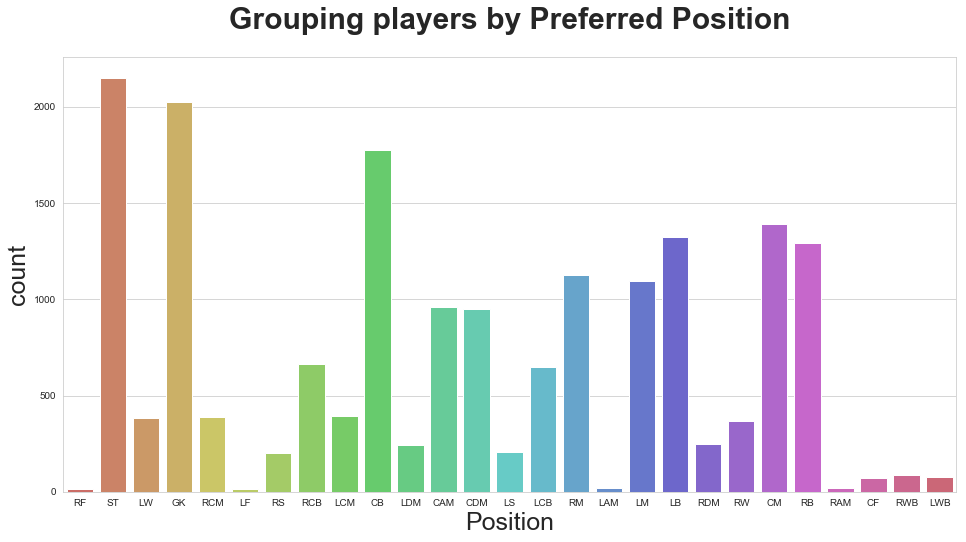

In [14]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

In [15]:
    dataset.loc[dataset['Position'] == 'RS', 'Position'] = 'A'
    dataset.loc[dataset['Position'] == 'LS', 'Position'] = 'A'
    dataset.loc[dataset['Position'] == 'RF', 'Position'] = 'A'
    dataset.loc[dataset['Position'] == 'LF', 'Position'] = 'A'
    dataset.loc[dataset['Position'] == 'ST', 'Position'] = 'A'
    dataset.loc[dataset['Position'] == 'LWB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'RWB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'LAM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'LCM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'LDM', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'RAM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'RDM', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'RCM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'CAM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'CDM', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'RCB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'LCB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'RW', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'LM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'RM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'CM', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'CB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'LW', 'Position'] ='A'
    dataset.loc[dataset['Position'] == 'LB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'RB', 'Position'] ='D'
    dataset.loc[dataset['Position'] == 'CF', 'Position'] ='A'

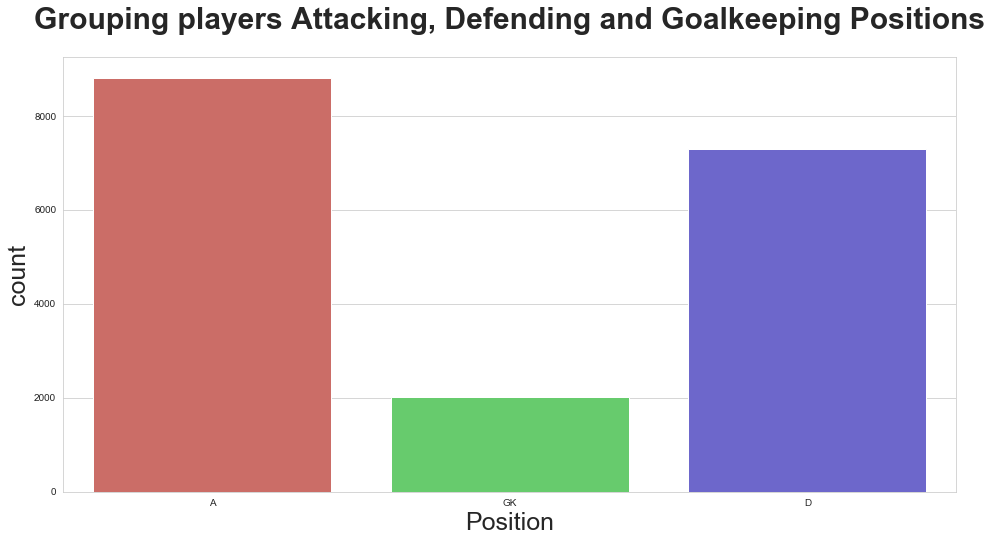

In [16]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players Attacking, Defending and Goalkeeping Positions', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=dataset, palette="hls");
plt.show()

In [17]:
player_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
for i, val in dataset.groupby(dataset['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position A: Acceleration, SprintSpeed, Agility
Position D: Strength, Stamina, Jumping
Position GK: GKReflexes, GKDiving, GKPositioning


<Figure size 864x576 with 0 Axes>

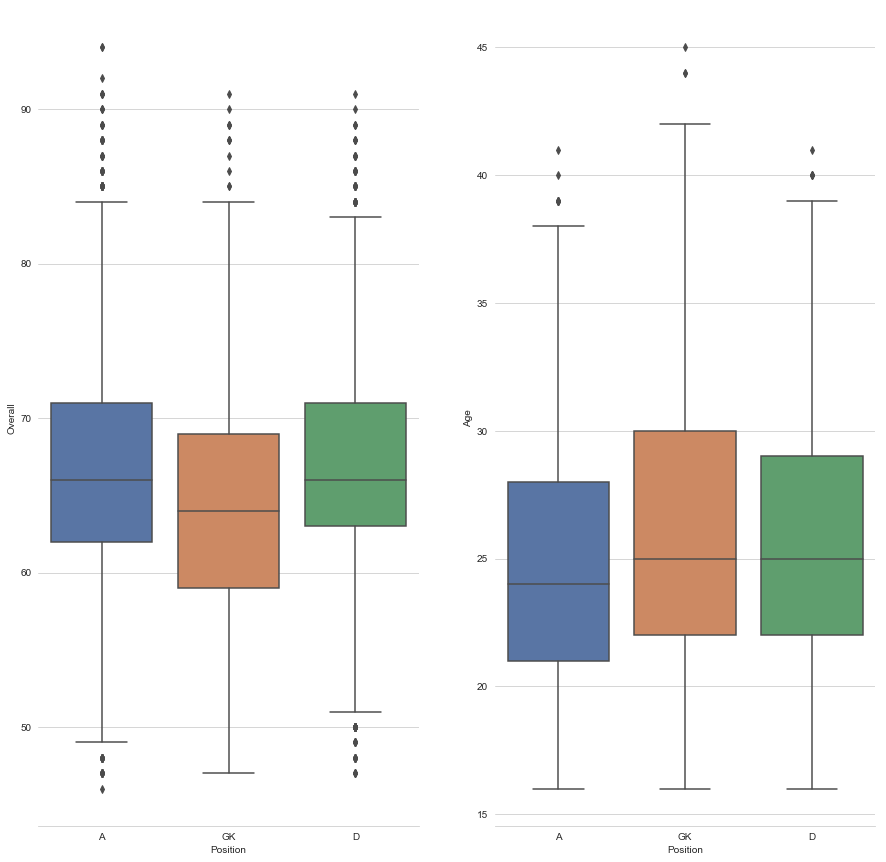

In [18]:
plt.figure(figsize=(12, 8))

# Set up the matplotlib figure
f, axes = plt.subplots(1,2,figsize=(15,15), sharex=False)
sns.despine(left=True)
def num(s):
        return int(s)
sns.set(font_scale=1)
dataset['Age'] = dataset['Age'].apply(lambda x: num(x))
dataset['Overall'] = dataset['Overall'].apply(lambda x: num(x))
sns.boxplot('Position', 'Overall', data = dataset, ax=axes[0])
sns.boxplot('Position', 'Age', data = dataset, ax=axes[1])


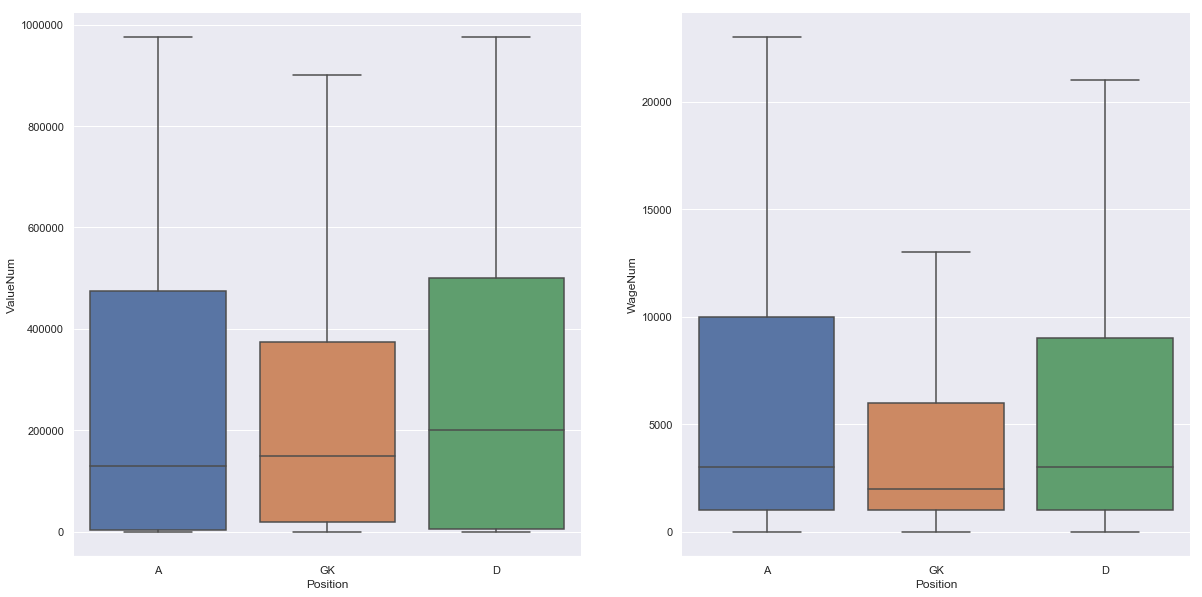

In [19]:
f, axes = plt.subplots(ncols= 2, figsize=(20, 10), sharex=False)
sns.despine(left=True)
sns.set(font_scale=3)

sns.boxplot('Position', 'ValueNum', data = dataset, showfliers=False, ax=axes[0])
sns.boxplot('Position', 'WageNum', data = dataset, showfliers=False, ax=axes[1])

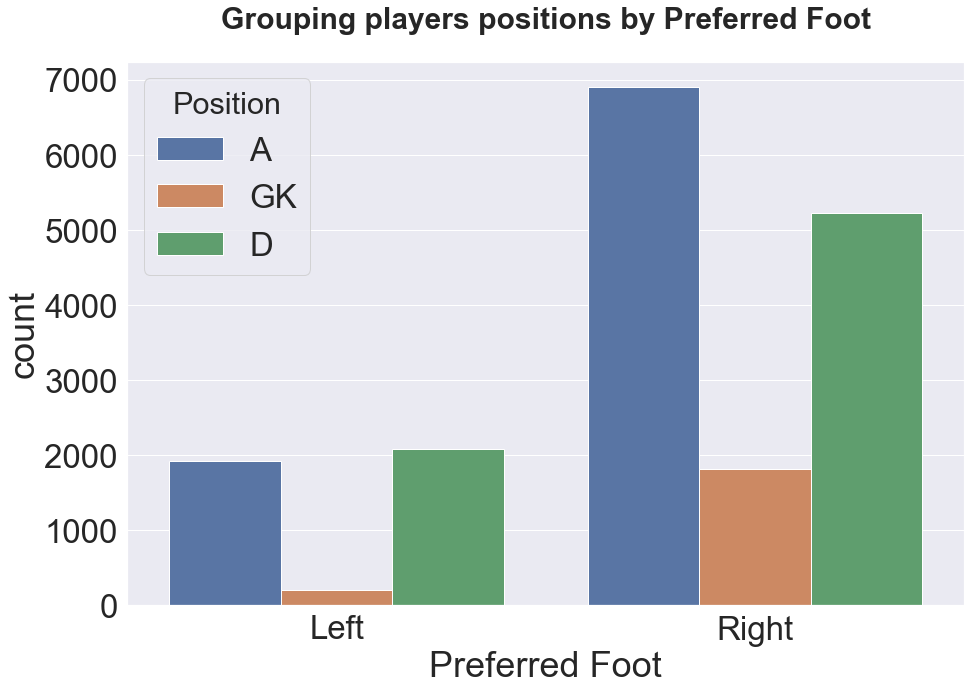

In [20]:
plt.figure(figsize=(15,10))
plt.title('Grouping players positions by Preferred Foot', fontsize=30, fontweight='bold', y=1.05,)
sns.countplot(x='Preferred Foot', data=dataset, hue='Position')

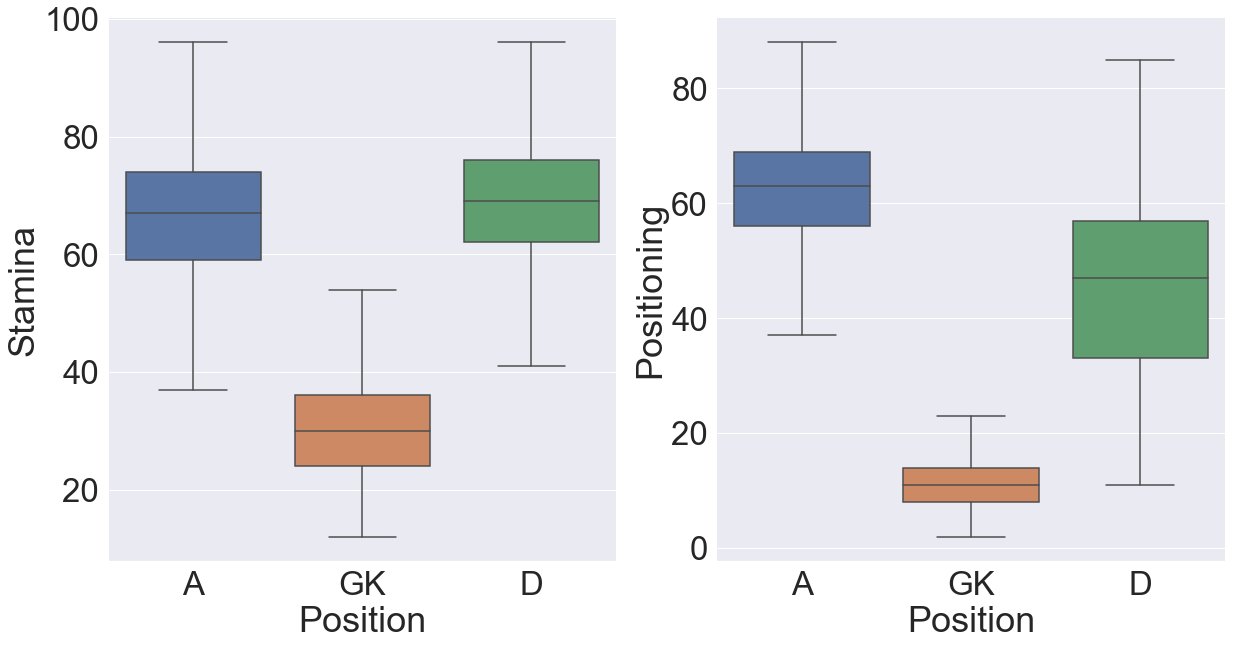

In [21]:
f, axes = plt.subplots(ncols= 2, figsize=(20, 10), sharex=False)
sns.despine(left=True)

sns.boxplot('Position', 'Stamina', data = dataset, showfliers=False, ax=axes[0])
sns.boxplot('Position', 'Positioning', data = dataset, showfliers=False, ax=axes[1])